In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
train_df = pd.read_csv('./Data/training_data.csv')
test_df = pd.read_csv('./Data/testing_data.csv')

In this notebook, we will build a simple NN model to predict some data

In [13]:
# Now we need to turn the data into a feature tensor and a target tensor
feature_col = train_df.keys().drop('price')
train_x = tf.convert_to_tensor(
    train_df[feature_col])
train_y = tf.convert_to_tensor(
    train_df['price']
)

In [37]:
# Define drop out rate
dropout_rate = 0.2
neurons = 64

# Define a function to return a tensorflow model, with dropout and batch normalization with 3 hidden layers, each with 64 neurons
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation='relu', input_shape=(train_x.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Now we can create a model
model = get_model()

# Now we can train the model and create a history object
history = model.fit(
    train_x, train_y,   
    epochs=5, 
    validation_split=0.2,
    verbose=1,
    shuffle=True,
    batch_size=32 
)

Epoch 1/5


2023-02-28 21:12:51.176623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5474/5477 [============================>.] - ETA: 0s - loss: 1.2239 - mae: 0.5159 - mse: 1.2239

2023-02-28 21:14:21.188393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5477/5477 [==============================] - 99s 18ms/step - loss: 1.2233 - mae: 0.5157 - mse: 1.2233 - val_loss: 3.5107 - val_mae: 1.5266 - val_mse: 3.5107
Epoch 2/5
5477/5477 [==============================] - 99s 18ms/step - loss: 0.0783 - mae: 0.2211 - mse: 0.0783 - val_loss: 2.3822 - val_mae: 1.3942 - val_mse: 2.3822
Epoch 3/5
5477/5477 [==============================] - 98s 18ms/step - loss: 0.0580 - mae: 0.1893 - mse: 0.0580 - val_loss: 4.4024 - val_mae: 0.9104 - val_mse: 4.4024
Epoch 4/5
5477/5477 [==============================] - 96s 17ms/step - loss: 0.0501 - mae: 0.1749 - mse: 0.0501 - val_loss: 7.4988 - val_mae: 0.9341 - val_mse: 7.4988
Epoch 5/5
5477/5477 [==============================] - 96s 17ms/step - loss: 0.0454 - mae: 0.1664 - mse: 0.0454 - val_loss: 6.7873 - val_mae: 0.6770 - val_mse: 6.7873


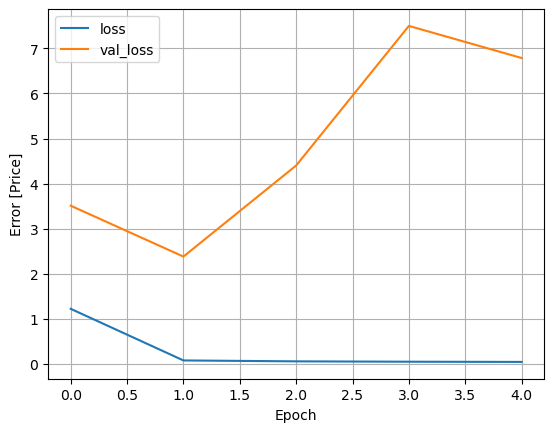

In [38]:
# Now we can plot the loss and the mean absolute error
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (15,) and arg 1 with shape (960,).

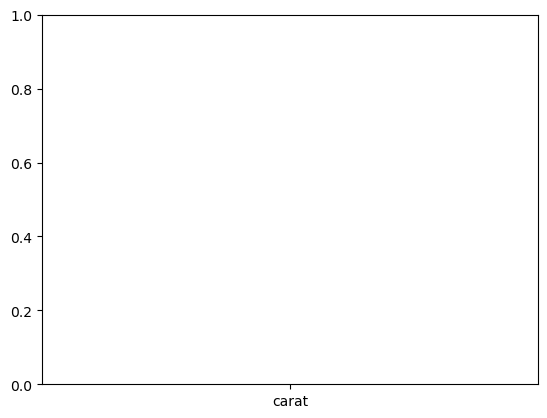

In [39]:
# We now want to look at the feature importance of our model which we can do with the weights of our model
weights = model.get_weights()

# We can now plot the weights of the model as a bar chart with the feature names
plt.bar(feature_col, weights[0].flatten())
plt.xticks(rotation=90)
plt.show()
